In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import ast
import matplotlib.pyplot as plt
#load data
df = pd.read_csv('/Users/saumyaariyawansha/Documents/Data Science/python_exercises/data_jobs.csv')
#data cleaning
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [4]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [9]:
job_titles = df['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Business Analyst',
 'Software Engineer',
 'Senior Data Engineer']

In [11]:
df_US_Top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [15]:
job_order = df_US_Top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

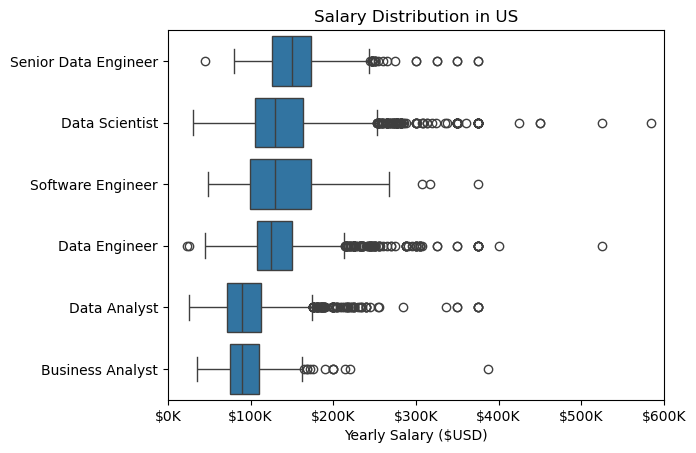

In [16]:
sns.boxplot(data=df_US_Top6, x='salary_year_avg', y='job_title_short', order=job_order)

plt.title('Salary Distribution in US')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.xlim(0, 600000)
plt.show()

In [20]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [21]:
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

In [23]:
df_DA_US = df_DA_US.explode('job_skills')

In [25]:
df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [29]:
df_DA_Top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

In [30]:
df_DA_Top_pay = df_DA_Top_pay.head(10)

In [33]:
df_DA_Skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

In [34]:
df_DA_Skills

,count,median
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
theano,1,100000.0
typescript,1,65000.0
ansible,1,159640.0


In [35]:
df_DA_Skills = df_DA_Skills.head(10).sort_values(by='median', ascending=False)

In [36]:
df_DA_Skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


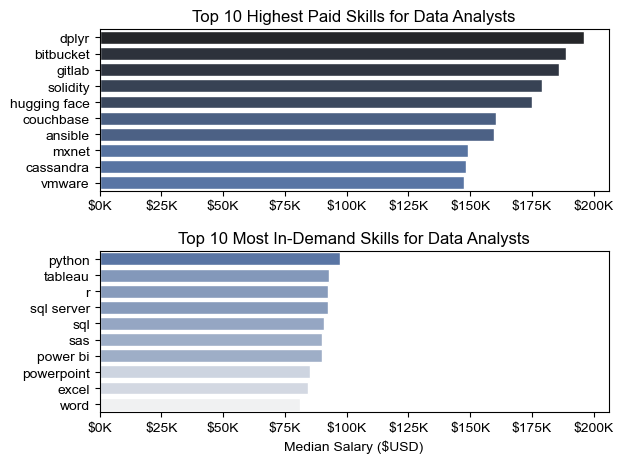

In [37]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_Top_pay, x='median', y=df_DA_Top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
#df_DA_Top_pay.plot(kind='barh', y='median', ax=ax[0], legend=False)
#ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[0].legend().remove()

sns.barplot(data=df_DA_Skills, x='median', y=df_DA_Skills.index, ax=ax[1], hue='median', palette='light:b')
#df_DA_Skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].legend().remove()

fig.tight_layout()